In [51]:
import tensorflow as tf
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

mpl.rcParams['agg.path.chunksize'] = 10000
print(tf.__version__)


2.18.0


In [52]:
observations=1000000
xs=np.random.uniform(low=-10,high=10,size=(observations,1))
zs=np.random.uniform(low=-10,high=10,size=(observations,1))
inputs=np.column_stack((xs,zs))
print(inputs.shape)

(1000000, 2)


In [53]:
noise = np.random.uniform(low=-1,high=1,size=(observations,1))
targets = 13 * xs + 7 * zs - 12 + noise
np.savez('TF_dataset',inputs=inputs,targets=targets)
print(targets.shape)

(1000000, 1)


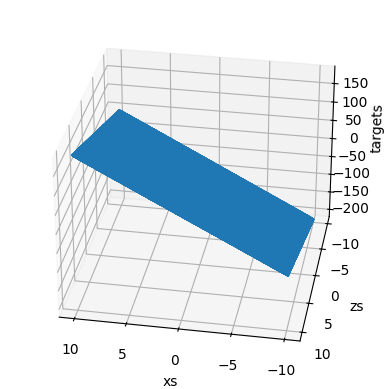

In [54]:
targets = targets.reshape(observations,)
xs = xs.reshape(observations,)
zs = zs.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot(xs,zs,targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('targets')
ax.view_init(azim=100)
plt.show()

In [55]:
init_range = 0.1
weights = np.random.uniform(low=-init_range,high=init_range,size=(2,1))
biases = np.random.uniform(low=-init_range,high=init_range,size=1)
print(weights,biases)

[[-0.07736155]
 [ 0.05484037]] [-0.0655827]


In [56]:
targets = targets.reshape(observations,1)
eta = 0.01
for i in range(100):
  outputs = np.dot(inputs, weights) + biases
  deltas = outputs - targets

  loss = np.sum(deltas ** 2) / 2 / observations
  print(loss)

  deltas_scaled = deltas / observations
  weights = weights - eta * np.dot(inputs.T,deltas_scaled)
  biases = biases - eta * np.sum(deltas_scaled)

3711.241927203519
1693.7157794671607
792.9422547921571
390.3659847932176
210.04981207040757
128.89815657575699
91.9979039295928
74.85207573134562
66.53231045013759
62.16320141174403
59.56956638245268
57.780796981442755
56.363649834867665
55.124604977916796
53.977087972079914
52.882237639374296
51.82248246635675
50.78975294675879
49.78022301485419
48.7919641072056
47.82389854966234
46.875332575225144
45.94574791708577
45.03470875383312
44.14182011498279
43.26670924462444
42.40901720831191
41.56839507105083
40.74450211600511
39.93700497508813
39.145577167834254
38.369898823863586
37.60965648867661
36.864542968023315
36.13425719085402
35.41850408190451
34.71699443989824
34.02944481954723
33.355577416514095
32.69511995493695
32.0478055773147
31.41337273663785
30.791565090690366
30.182131398465913
29.584825418649636
28.999405810123168
28.425636034449695
27.86328426030061
27.312123269784056
26.77193036663747
26.242487286247364
25.723580107459597
25.214999166144636
24.716538970483015
24.22799

In [57]:
print(weights,biases)

[[12.99920648]
 [ 7.0004437 ]] [-7.63073151]


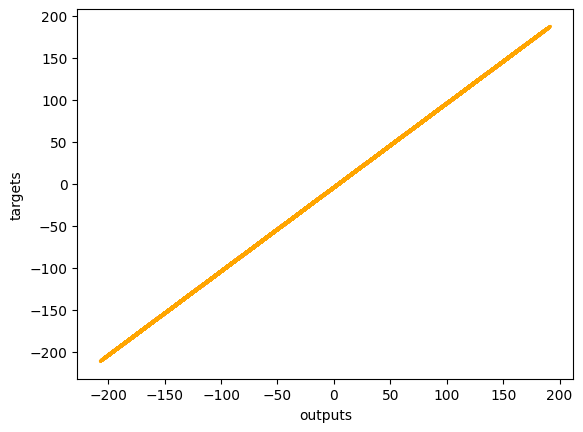

In [58]:
plt.plot(outputs,targets, color="orange")
plt.xlabel("outputs")
plt.ylabel("targets")
plt.show()